# Exploratory Data Analysis

### Imports and load the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
articles = pd.read_csv('Data/h-and-m-personalized-fashion-recommendations/articles.csv')
articles.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [3]:
articles.shape

(105542, 25)

In [4]:
customers = pd.read_csv('Data/h-and-m-personalized-fashion-recommendations/customers.csv')
customers.head(1)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...


In [5]:
customers.shape

(1371980, 7)

In [6]:
sample_submission = pd.read_csv('Data/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
sample_submission.head(1)

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...


In [7]:
transactions_train = pd.read_csv('Data/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
transactions_train.head(1)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2


In [8]:
transactions_train.shape

(31788324, 5)

In [9]:
pd.set_option('display.max_columns', 50)

In [10]:
articles.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


### Articles Dataframe

This table contains all H&M articles with details such as a type of product, a color, a product group and other features.

Article data description:

- article_id : A unique identifier of every article.
- product_code, prod_name : A unique identifier of every product and its name (not the same).
- product_type, product_type_name : The group of product_code and its name
- graphical_appearance_no, graphical_appearance_name : The group of graphics and its name
- colour_group_code, colour_group_name : The group of color and its name
- perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : The added color info
- department_no, department_name: : A unique identifier of every dep and its name
- index_code, index_name: : A unique identifier of every index and its name
- index_group_no, index_group_name: : A group of indeces and its name
- section_no, section_name: : A unique identifier of every section and its name
- garment_group_no, garment_group_name: : A unique identifier of every garment and its name
- detail_desc: : Details

In [11]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


Lets take a look at the articles by the index_name:

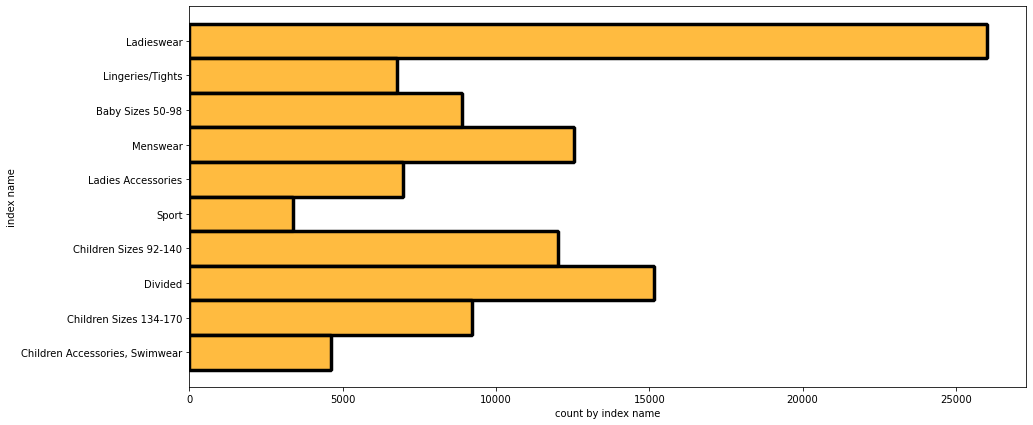

In [12]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion. So now, lets look at the Garment Group names and stack it with the index group name. 

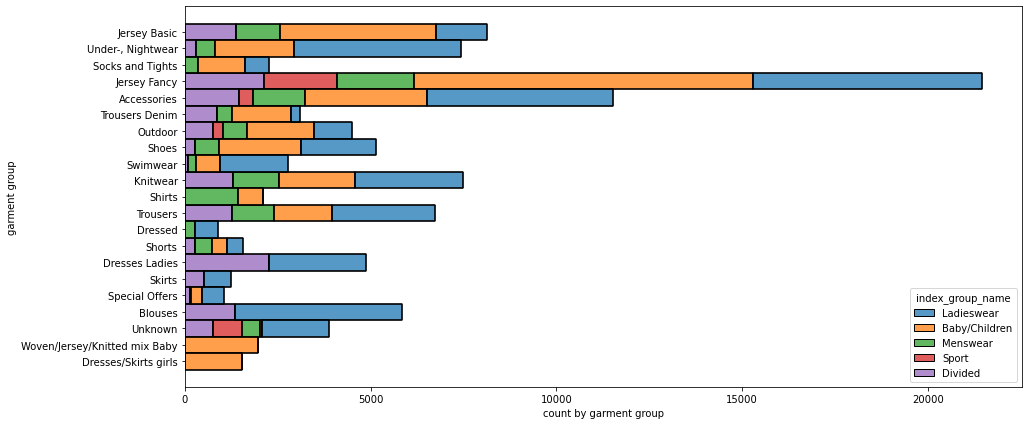

In [13]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack", )
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. The next by number is accessories. <br><br>
Now, let's pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.

In [14]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

And look at the product group-product structure. Accessories are really various, the most numerous: bags, earrings and hats. However, trousers prevail.

In [15]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

Finally, let's look at the table with number of unique values in columns:

In [16]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


### Customers Dataframe

Customers data description:

- customer_id : A unique identifier of every customer
- FN : 1 or missed
- Active : 1 or missed
- club_member_status : Status in club
- fashion_news_frequency : How often H&M may send news to customer
- age : The current age
- postal_code : Postal code of customer